# NPS Project
See my github repo: [noltron000](https://github.com/noltron000/ds-1-1-nps-project)

In [154]:
import pandas
import numpy
import seaborn

data = pandas.read_csv('surveys/2017/student_feedback.csv')

In [155]:
data

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right
6,28,Los Angeles,Apps,Week 7,5,Just right
7,65,San Francisco,Apps,Week 1,5,A little too slow
8,101,Santa Clara,Apps,Week 1,5,A little too slow
9,124,Santa Clara,Apps,Week 1,5,Just right


## Parsing Data

In [156]:
# drop the arbitrary ID column; its not relevent
data = data.drop('ID', axis=1)

In [157]:
# force lowercase on week column
data['Week'] = data['Week'].str.lower()

In [158]:
# Dropping the first five characters from the week column;
# this should gives a numeric string in the end.
#
# Each week begins with five characters -- "week "
# and ends with a numeric string, such as "3".
data['Week'] = data['Week'].str[5:]

# Still, the data is all stored as strings.
data.dtypes

Location           object
Track              object
Week               object
Rating (Num)       object
Schedule Pacing    object
dtype: object

In [159]:
# Start by converting weeks to an integer value.
data['Week'] = pandas.to_numeric(data['Week'], errors='coerce').astype(float)

data.dtypes

Location            object
Track               object
Week               float64
Rating (Num)        object
Schedule Pacing     object
dtype: object

In [160]:
# Looks like the rating is a string too, instead of a number.

# First a rename would be nice.
data['Rating'] = data['Rating (Num)']
data = data.drop('Rating (Num)', axis=1)

# Now we can convert these ratings to numeric values as well.
data['Rating'] = pandas.to_numeric(data['Rating'], errors='coerce').astype(float)

data.dtypes

Location            object
Track               object
Week               float64
Schedule Pacing     object
Rating             float64
dtype: object

In [172]:
### TODO: convert track data to an array or tuple.
### A comma-deliminated string is not good practice!

for item in data['Track']:
	if not pandas.isna(item):
		print(item)

Apps, Explorer
Apps
Games
Apps, Explorer
Apps
Apps
Apps
Apps
Apps
Apps
Apps
Apps
Apps
Apps, Explorer
Apps
Apps
Apps, Explorer
Apps
Games
Apps, Explorer
Apps
Apps
Apps
Apps
Apps, Explorer
Apps
Apps, Explorer
Apps
Apps
Apps
Apps
Games
Apps
Games
Apps
Apps, Explorer
Apps
Apps, Explorer
Apps
Apps
Apps
Apps
Apps
Apps
VR
Apps
Apps
Apps
Apps
Apps
Apps
Apps, Explorer
Games
Apps, Explorer
Apps
Apps, Explorer
Apps, Explorer
Apps
Apps
Apps
Apps
Apps
Apps
Apps, Explorer
Apps, Explorer
Apps, Explorer
Apps
Apps
Apps
Apps
Games
Apps, Explorer
Apps
Apps
Apps
Apps
Apps
Apps
Apps
Games
Games
Apps
Apps
Apps
Apps, Explorer
Apps
Apps
Apps
Apps
Apps
Apps, Explorer
Apps, Explorer
Apps
Apps, Explorer
Apps
Apps
Apps, Explorer
Apps
Apps
Apps
Games
Apps
Apps
Apps, Explorer
VR
VR
Apps
Apps
Apps
Apps, Explorer
Apps
Apps, Explorer
Apps
Games
Apps
Games
Apps
Apps
Games
Apps, Explorer
Apps
Apps, Explorer
Apps, Explorer
Apps
Games
Games
Games
Games
Games
Apps
Apps
Games
Apps
Apps, Explorer
Apps, Explorer
Apps
Games
Ap

## Visualizations

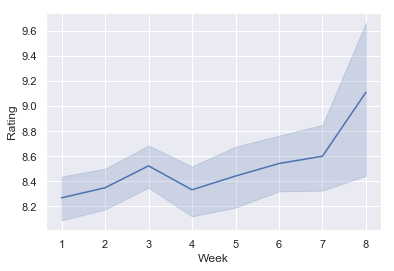

In [171]:
seaborn.set(style='darkgrid')

seaborn.lineplot(x='Week', y='Rating', data=data)